# [[데이콘] 소비자 데이터 기반 소비 예측 경진대회](https://dacon.io/competitions/official/235893/overview/description)
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 평가 지표
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [2]:
train = pd.read_csv('data/소비 예측 경진대회/train.csv')
test = pd.read_csv('data/소비 예측 경진대회/test.csv')

In [3]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [5]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [6]:
train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'target']].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,2525.000000


In [7]:
train[['Education']].value_counts(), train[['Education']].value_counts(normalize=True)

(Education 
 Graduation    570
 PhD           254
 Master        173
 2n Cycle       89
 Basic          22
 dtype: int64,
 Education 
 Graduation    0.514440
 PhD           0.229242
 Master        0.156137
 2n Cycle      0.080325
 Basic         0.019856
 dtype: float64)

In [8]:
train[['Marital_Status']].value_counts(), train[['Marital_Status']].value_counts(normalize=True)

(Marital_Status
 Married           415
 Together          296
 Single            234
 Divorced          120
 Widow              39
 Alone               2
 Absurd              1
 YOLO                1
 dtype: int64,
 Marital_Status
 Married           0.374549
 Together          0.267148
 Single            0.211191
 Divorced          0.108303
 Widow             0.035199
 Alone             0.001805
 Absurd            0.000903
 YOLO              0.000903
 dtype: float64)

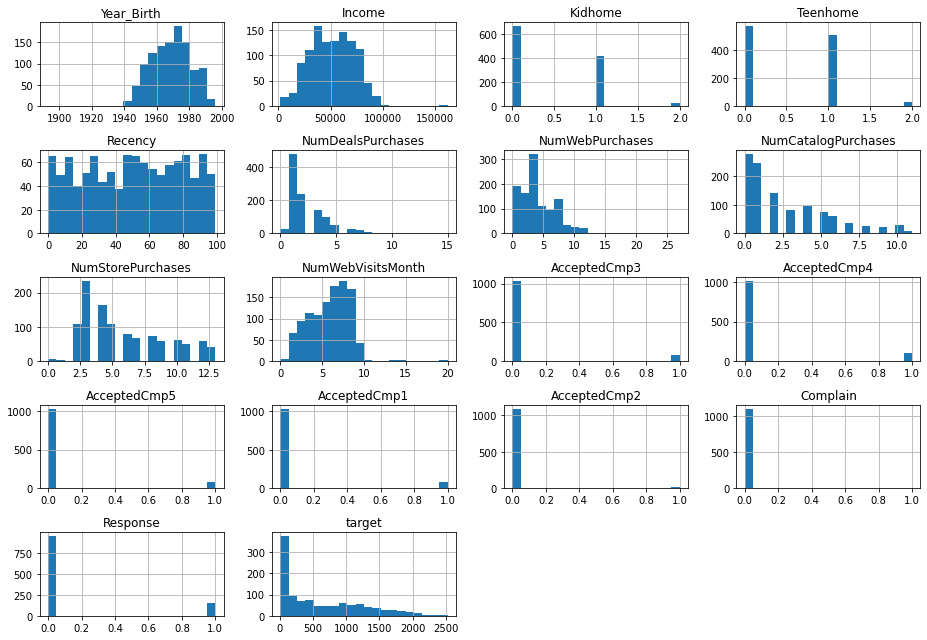

In [9]:
train.iloc[:, 1:].hist(bins = 20, figsize = (13, 9))
plt.tight_layout()
plt.show()

<Figure size 1152x1368 with 0 Axes>

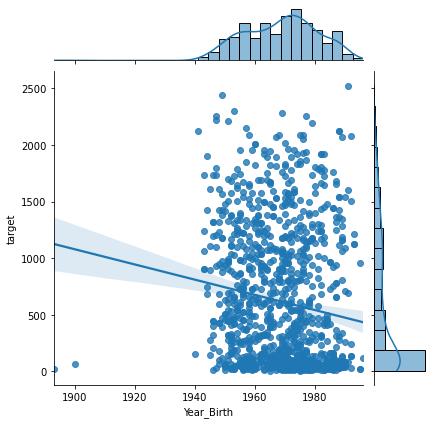

In [10]:
plt.figure(figsize = (16, 19))
sns.jointplot(x = train['Year_Birth'], y = train['target'], kind='reg')
plt.show()

가장 최근에 태어난 사람일 수록 제품 총 소비량이 작다.

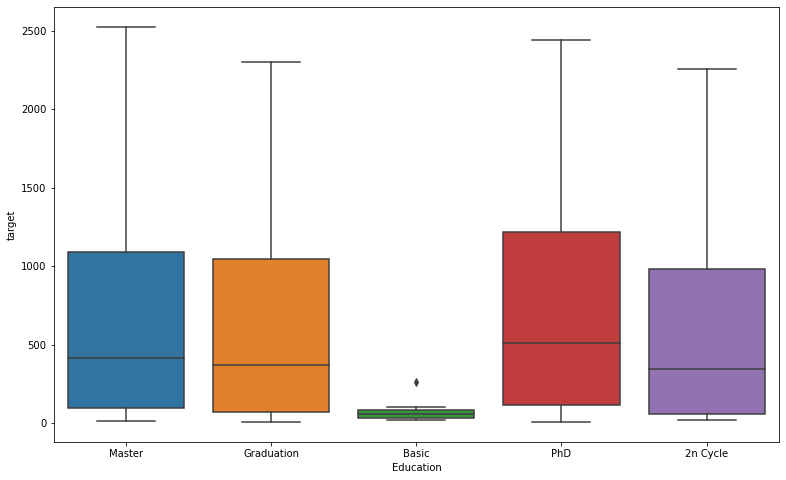

In [11]:
plt.figure(figsize = (13, 8))
sns.boxplot(data = train, x = 'Education', y='target');

AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0  
Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  

In [12]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [13]:
print(pd.pivot_table(train, index = 'AcceptedCmp1', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp2', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp3', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp4', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp5', values='target', aggfunc=['mean', 'sum']))

                     mean     sum
                   target  target
AcceptedCmp1                     
0              558.000969  575857
1             1419.921053  107914


                     mean     sum
                   target  target
AcceptedCmp2                     
0              607.331806  662599
1             1245.411765   21172


                    mean     sum
                  target  target
AcceptedCmp3                    
0             610.405432  629328
1             707.051948   54443


                     mean     sum
                   target  target
AcceptedCmp4                     
0              569.679171  577085
1             1123.010526  106686


                     mean     sum
                   target  target
AcceptedCmp5                     
0              540.003891  555124
1             1608.087500  128647


캠페인 횟수와 제안 수락 여부에 따른 제품 총 소비량의 평균과 합을 보면 제안을 수락하지 않았을 때 소비량이 더 많았다.  
캠페인 횟수는 상관이 없는 것으로 파악한다.

In [14]:
print(pd.pivot_table(train, index = 'Complain', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Complain                    
0         620.501821  681311
1         246.000000    2460


고객이 지난 2년 동안 불만을 제기한 경험이 있으면 제품 총 소비량이 현저히 줄어든다.

In [15]:
print(pd.pivot_table(train, index = 'Response', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Response                    
0         557.613039  530290
1         977.585987  153481


In [16]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [17]:
train[['Dt_Customer']]

,Dt_Customer
0,21-01-2013
1,24-05-2014
2,08-04-2013
3,29-03-2014
4,10-06-2014
...,...
1103,31-03-2013
1104,21-10-2013
1105,16-12-2013
1106,30-05-2013


In [3]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(train['Dt_Customer'])):
    day.append(int(train['Dt_Customer'][i].split('-')[0]))
    month.append(int(train['Dt_Customer'][i].split('-')[1]))
    year.append(int(train['Dt_Customer'][i].split('-')[2]))

In [4]:
train['year']=year
train['month']=month
train['day']=day

In [5]:
week_day = pd.to_datetime(train['Dt_Customer']).dt.day_name()
train['week_day'] = week_day
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,541,2013,1,21,Monday
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,899,2014,5,24,Saturday
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,901,2013,4,8,Sunday
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,50,2014,3,29,Saturday
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,1,0,0,0,444,2014,6,10,Monday


In [6]:
# Dt_Customer 변수 삭제
train.drop(columns=['Dt_Customer', 'id'], inplace = True)
train.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day
0,1974,Master,Together,46014.0,1,1,21,10,7,1,...,0,0,0,0,0,541,2013,1,21,Monday
1,1962,Graduation,Single,76624.0,0,1,68,1,5,10,...,0,0,0,0,0,899,2014,5,24,Saturday
2,1951,Graduation,Married,75903.0,0,1,50,2,6,6,...,0,0,0,0,0,901,2013,4,8,Sunday


In [22]:
# 고객이 회사에 등록한 나이
train['Customer_age'] = train['year'] - train['Year_Birth']

In [23]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day,Customer_age
0,1974,Master,Together,46014.0,1,1,21,10,7,1,...,0,0,0,0,541,2013,1,21,Monday,39
1,1962,Graduation,Single,76624.0,0,1,68,1,5,10,...,0,0,0,0,899,2014,5,24,Saturday,52
2,1951,Graduation,Married,75903.0,0,1,50,2,6,6,...,0,0,0,0,901,2013,4,8,Sunday,62
3,1974,Basic,Married,18393.0,1,0,2,2,3,0,...,0,0,0,0,50,2014,3,29,Saturday,40
4,1946,PhD,Together,64014.0,2,1,56,7,8,2,...,1,0,0,0,444,2014,6,10,Monday,68


<Figure size 1152x1368 with 0 Axes>

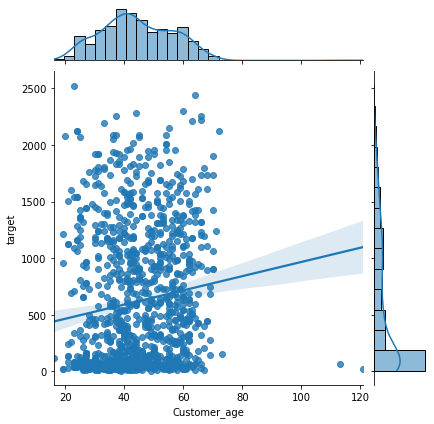

In [24]:
plt.figure(figsize = (16, 19))
sns.jointplot(data = train, x = 'Customer_age', y = 'target', kind='reg')
plt.show()

고객이 회사에 등록한 나이가 증가할수록 제품 총 소비량이 증가한다.

In [25]:
train_number = train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'year', 'month', 'day', 'Customer_age']]
feature_train = train_number.columns.tolist()

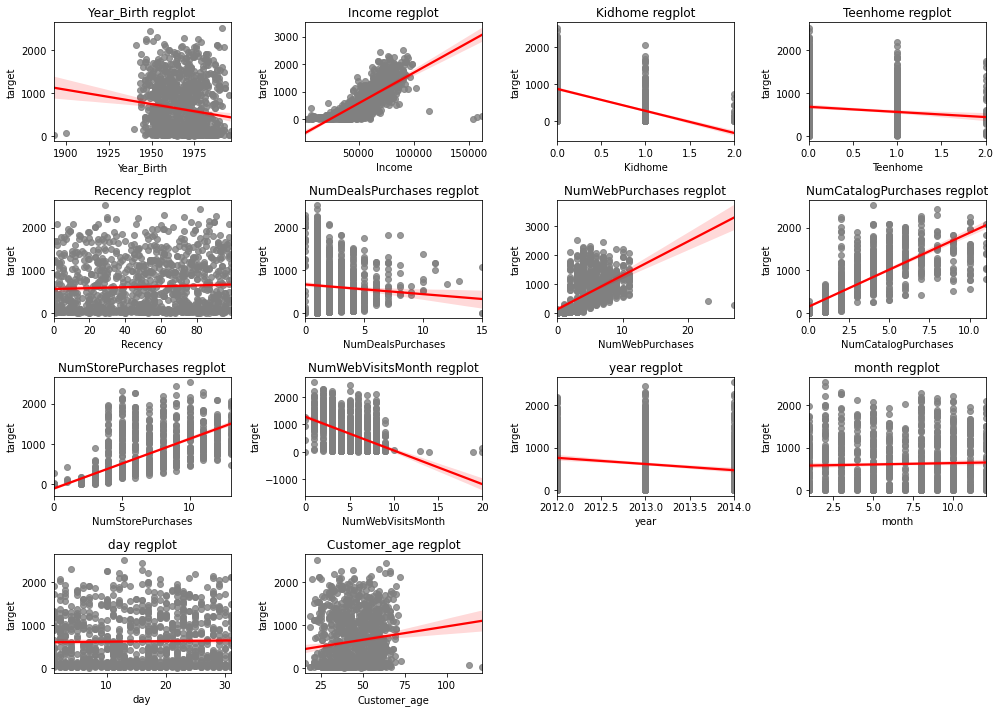

In [26]:
plt.figure(figsize = (14,10))

for i in range(len(feature_train)):
    plt.subplot(4, 4, i+1)
    plt.title(f'{feature_train[i]} regplot')
    sns.regplot(data = train, x = train[feature_train[i]], y = train.target, line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})
plt.tight_layout()
plt.show()

In [27]:
train_number = train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'year', 'month', 'day', 'Customer_age', 'target']]
train_number.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'year', 'month', 'day',
       'Customer_age', 'target'],
      dtype='object')

In [28]:
corr = train_number.corr().round(2)
corr

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,year,month,day,Customer_age,target
Year_Birth,1.00,-0.22,0.25,-0.34,-0.00,-0.09,-0.17,-0.17,-0.13,0.09,-0.01,-0.01,0.00,-1.00,-0.14
Income,-0.22,1.00,-0.49,0.06,0.02,-0.13,0.49,0.69,0.62,-0.65,0.02,-0.02,-0.02,0.22,0.78
Kidhome,0.25,-0.49,1.00,-0.06,0.02,0.22,-0.36,-0.51,-0.49,0.42,0.08,-0.03,-0.01,-0.25,-0.54
Teenhome,-0.34,0.06,-0.06,1.00,0.02,0.41,0.17,-0.09,0.05,0.13,-0.02,-0.01,-0.01,0.34,-0.11
Recency,-0.00,0.02,0.02,0.02,1.00,0.01,0.02,0.06,0.00,-0.02,-0.07,0.06,0.00,-0.00,0.05
NumDealsPurchases,-0.09,-0.13,0.22,0.41,0.01,1.00,0.24,-0.08,0.09,0.38,-0.16,-0.02,0.00,0.08,-0.07
NumWebPurchases,-0.17,0.49,-0.36,0.17,0.02,0.24,1.00,0.44,0.50,-0.09,-0.16,0.01,0.03,0.16,0.55
NumCatalogPurchases,-0.17,0.69,-0.51,-0.09,0.06,-0.08,0.44,1.00,0.55,-0.51,-0.11,0.02,-0.00,0.16,0.80
NumStorePurchases,-0.13,0.62,-0.49,0.05,0.00,0.09,0.50,0.55,1.00,-0.43,-0.12,0.02,-0.02,0.12,0.68
NumWebVisitsMonth,0.09,-0.65,0.42,0.13,-0.02,0.38,-0.09,-0.51,-0.43,1.00,-0.22,0.05,0.02,-0.11,-0.49


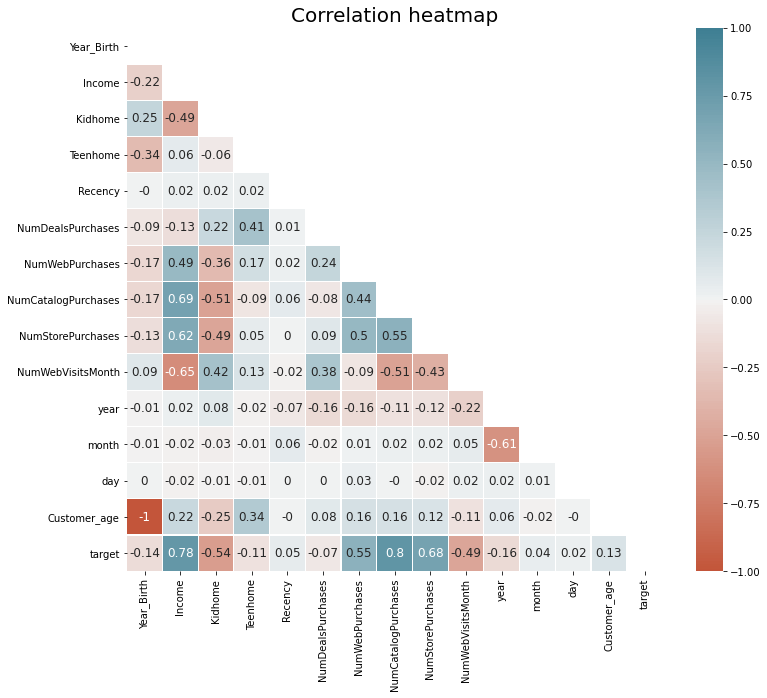

In [29]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from : mask에서 인덱스를 반환 (위쪽 삼각형에 True, 아래 삼각형에 False)

plt.figure(figsize=(12, 10))
colormap = plt.cm.PuBu
sns.heatmap(data = corr, cmap=sns.diverging_palette(20, 220, n=200), mask=mask,
            annot = True, annot_kws={'size' : 12}, linecolor='white', linewidths=.2,
           vmin = -1,vmax = 1 # 컬러바 범위 -1 ~ 1
           )
plt.title('Correlation heatmap', fontsize=20)
plt.show()

- target 변수와 상관관계가 높은 변수(절댓값 0.7 이상): Income,  NumCatalogPurchases
- 변수 간 상관성이 높은 변수 쌍: (NumCatalogPurchases, Income) → +0.69 / (Year_Birth, Customer_age) → -1
 - Year_Birth와 Customer_age는 상관성이 높으므로 파생변수인 Customer_age 삭제

In [30]:
train = train.drop(columns= 'Customer_age')
train.head(0)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day


---

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
train.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day
0,1974,Master,Together,46014.0,1,1,21,10,7,1,...,0,0,0,0,0,541,2013,1,21,Monday
1,1962,Graduation,Single,76624.0,0,1,68,1,5,10,...,0,0,0,0,0,899,2014,5,24,Saturday


In [9]:
train.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'year', 'month',
       'day', 'week_day'],
      dtype='object')

In [40]:
X = train[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year', 'month',
       'day', 'week_day']]
y = train.target

In [41]:
X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [42]:
X_fit.shape, X_val.shape, y_fit.shape, y_val.shape

((775, 23), (333, 23), (775,), (333,))

In [43]:
categoric_feature = ['Education', 'Marital_Status', 'week_day']
numeric_feature = ['Year_Birth',  'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'year', 'month', 'day']

columm_transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_feature),
    ('cat', OneHotEncoder(handle_unknown = 'ignore'), categoric_feature)
])

In [46]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', LinearRegression())])
scores = cross_val_score(estimator=pipeline, X = X, y = y, cv = 5, n_jobs=-1, scoring = 'neg_mean_squared_error')
rmse_scores  = np.sqrt(-1 * scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-6.67980100e+04 -6.88724900e+04 -7.03501200e+04 -2.39582227e+28
 -8.89438900e+04]
 5 folds 의 개별 RMSE scores :  [2.58450000e+02 2.62440000e+02 2.65240000e+02 1.54784439e+14
 2.98230000e+02]
 5 folds 의 평균 RMSE : 30956887869978.055 


In [45]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', LinearRegression())])
param_grid = {'model__fit_intercept': [True, False],
             'model__normalize': [True, False]}

gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
results = gs.fit(X_fit, y_fit)

print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {:.3f}'.format(np.sqrt(-1*gs.best_score_)))

최적 파라미터: {'model__fit_intercept': False, 'model__normalize': True}
최적 점수: 13.921


In [14]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(test['Dt_Customer'])):
    day.append(int(test['Dt_Customer'][i].split('-')[0]))
    month.append(int(test['Dt_Customer'][i].split('-')[1]))
    year.append(int(test['Dt_Customer'][i].split('-')[2]))

test['year']=year
test['month']=month
test['day']=day

week_day = pd.to_datetime(test['Dt_Customer']).dt.day_name()
test['week_day'] = week_day
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,0,0,0,0,1,0,2013,4,15,Monday
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,0,0,0,0,0,0,2013,10,5,Friday
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,1,0,0,0,0,0,2013,1,10,Tuesday
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,0,0,1,0,0,0,2012,11,12,Tuesday


In [15]:
test = test.drop(columns=['id', 'Dt_Customer'])
test.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,1979,Graduation,Single,57537.0,1,0,83,4,4,3,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1955,Graduation,Together,65748.0,0,1,58,2,2,4,...,0,0,0,0,1,0,2013,4,15,Monday
2,1984,Graduation,Married,55434.0,1,0,21,3,5,3,...,0,0,0,0,0,0,2013,10,5,Friday


In [16]:
test.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year', 'month', 'day',
       'week_day'],
      dtype='object')

In [66]:
linear_model = gs.best_estimator_

# 예측값 도출
y_predict = linear_model.predict(test)
y_predict.shape

(1108,)

In [75]:
submission = pd.read_csv('data/소비 예측 경진대회/sample_submission.csv')
submission.head(0)

,id,target


In [74]:
# 예측 y값 제출 데이터에 입력
linear_df = submission.copy()
linear_df['target'] = y_predict
print(linear_df.head())

# 제출 데이터 저장
linear_df.to_csv('data/소비 예측 경진대회/01.linear_df.csv', index=False)

   id       target
0   0   763.337652
1   1   883.362291
2   2   888.412927
3   3  1075.523911
4   4  1414.660750


---

In [76]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', Lasso())])
scores = cross_val_score(estimator=pipeline, X = X, y = y, cv = 5, n_jobs=-1, scoring = 'neg_mean_squared_error')
rmse_scores  = np.sqrt(-1 * scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -66552.3   -69241.87  -70208.7  -100296.07  -69611.91]
 5 folds 의 개별 RMSE scores :  [257.98 263.14 264.97 316.7  263.84]
 5 folds 의 평균 RMSE : 273.324 


In [77]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', Lasso())])
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
results = gs.fit(X_fit, y_fit)

print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {:.3f}'.format(np.sqrt(-1*gs.best_score_)))

최적 파라미터: {'model__alpha': 1}
최적 점수: 284.422


In [57]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(test['Dt_Customer'])):
    day.append(int(test['Dt_Customer'][i].split('-')[0]))
    month.append(int(test['Dt_Customer'][i].split('-')[1]))
    year.append(int(test['Dt_Customer'][i].split('-')[2]))

test['year']=year
test['month']=month
test['day']=day

week_day = pd.to_datetime(test['Dt_Customer']).dt.day_name()
test['week_day'] = week_day
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,0,0,0,0,1,0,2013,4,15,Monday
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,0,0,0,0,0,0,2013,10,5,Friday
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,1,0,0,0,0,0,2013,1,10,Tuesday
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,0,0,1,0,0,0,2012,11,12,Tuesday


In [62]:
test = test.drop(columns=['id', 'Dt_Customer'])
test.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,1979,Graduation,Single,57537.0,1,0,83,4,4,3,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1955,Graduation,Together,65748.0,0,1,58,2,2,4,...,0,0,0,0,1,0,2013,4,15,Monday
2,1984,Graduation,Married,55434.0,1,0,21,3,5,3,...,0,0,0,0,0,0,2013,10,5,Friday


In [63]:
test.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year', 'month', 'day',
       'week_day'],
      dtype='object')

In [78]:
lasso_model = gs.best_estimator_

# 예측값 도출
y_predict = lasso_model.predict(test)
y_predict.shape

(1108,)

In [79]:
submission = pd.read_csv('data/소비 예측 경진대회/sample_submission.csv')
submission.head(0)

,id,target


In [87]:
lasso_df = submission.copy()
lasso_df['target'] = y_predict
print(lasso_df.head())

# 제출 데이터 저장
lasso_df.to_csv('data/소비 예측 경진대회/02.lasso_df.csv', index=False)

   id       target
0   0   760.068455
1   1   922.189320
2   2   898.864046
3   3  1076.934545
4   4  1390.031111


---

In [83]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', Ridge())])
scores = cross_val_score(estimator=pipeline, X = X, y = y, cv = 5, n_jobs=-1, scoring = 'neg_mean_squared_error')
rmse_scores  = np.sqrt(-1 * scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-67970.48 -69232.66 -70934.79 -98774.14 -69571.64]
 5 folds 의 개별 RMSE scores :  [260.71 263.12 266.34 314.28 263.76]
 5 folds 의 평균 RMSE : 273.643 


In [84]:
pipeline = Pipeline([('processor', columm_transformer),
                   ('model', Ridge())])
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
results = gs.fit(X_fit, y_fit)

print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {:.3f}'.format(np.sqrt(-1*gs.best_score_)))

최적 파라미터: {'model__alpha': 1}
최적 점수: 283.880


In [57]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(test['Dt_Customer'])):
    day.append(int(test['Dt_Customer'][i].split('-')[0]))
    month.append(int(test['Dt_Customer'][i].split('-')[1]))
    year.append(int(test['Dt_Customer'][i].split('-')[2]))

test['year']=year
test['month']=month
test['day']=day

week_day = pd.to_datetime(test['Dt_Customer']).dt.day_name()
test['week_day'] = week_day
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,0,0,0,0,1,0,2013,4,15,Monday
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,0,0,0,0,0,0,2013,10,5,Friday
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,1,0,0,0,0,0,2013,1,10,Tuesday
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,0,0,1,0,0,0,2012,11,12,Tuesday


In [62]:
test = test.drop(columns=['id', 'Dt_Customer'])
test.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,1979,Graduation,Single,57537.0,1,0,83,4,4,3,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1955,Graduation,Together,65748.0,0,1,58,2,2,4,...,0,0,0,0,1,0,2013,4,15,Monday
2,1984,Graduation,Married,55434.0,1,0,21,3,5,3,...,0,0,0,0,0,0,2013,10,5,Friday


In [85]:
ridge_model = gs.best_estimator_

# 예측값 도출
y_predict = ridge_model.predict(test)
y_predict.shape

(1108,)

In [86]:
submission = pd.read_csv('data/소비 예측 경진대회/sample_submission.csv')
submission.head(0)

,id,target


In [88]:
ridge_df = submission.copy()
ridge_df['target'] = y_predict
print(ridge_df.head())

# 제출 데이터 저장
ridge_df.to_csv('data/소비 예측 경진대회/03.ridge_model.csv', index=False)

   id       target
0   0   760.068455
1   1   922.189320
2   2   898.864046
3   3  1076.934545
4   4  1390.031111


---

In [22]:
import lightgbm as lgbm

pipeline = Pipeline([('processor', columm_transformer),
                   ('model', lgbm.LGBMRegressor())])
scores = cross_val_score(estimator=pipeline, X = X, y = y, cv = 5, n_jobs=-1, scoring = 'neg_mean_squared_error')
rmse_scores  = np.sqrt(-1 * scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-38798.79 -40864.62 -45541.63 -65371.74 -45700.37]
 5 folds 의 개별 RMSE scores :  [196.97 202.15 213.4  255.68 213.78]
 5 folds 의 평균 RMSE : 216.397 


In [32]:
from sklearn.metrics import mean_absolute_error

model = pipeline.fit(X_fit, y_fit)

y_fit_pred = model.predict(X_fit)
rmse_fit = np.sqrt(mean_squared_error(y_fit, y_fit_pred))

y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print('학습 RMSE: {}'.format(rmse_fit)) # 작을수록 좋음
print('학습 RMSE: {}'.format(rmse_val)) # 작을수록 좋음

학습 RMSE: 84.53684398177393
학습 RMSE: 215.73488295530944


In [38]:
# pipeline = Pipeline([('processor', columm_transformer),
#                    ('model', lgbm.LGBMRegressor())])
# param_grid = {'model__learning_rate': [0.05, 0.1, 0.2],
#              'model__max_depth': [3, 5, 7],
#              'model__n_estimators': [100, 200, 300, 400, 500]}

# gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
# results = gs.fit(X_fit, y_fit)

# print('최적 파라미터: {}'.format(gs.best_params_))
# print('최적 점수: {:.3f}'.format(np.sqrt(-1*gs.best_score_)))

최적 파라미터: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 300}
최적 점수: 226.260


In [57]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(test['Dt_Customer'])):
    day.append(int(test['Dt_Customer'][i].split('-')[0]))
    month.append(int(test['Dt_Customer'][i].split('-')[1]))
    year.append(int(test['Dt_Customer'][i].split('-')[2]))

test['year']=year
test['month']=month
test['day']=day

week_day = pd.to_datetime(test['Dt_Customer']).dt.day_name()
test['week_day'] = week_day
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,0,0,0,0,1,0,2013,4,15,Monday
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,0,0,0,0,0,0,2013,10,5,Friday
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,1,0,0,0,0,0,2013,1,10,Tuesday
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,0,0,1,0,0,0,2012,11,12,Tuesday


In [62]:
test = test.drop(columns=['id', 'Dt_Customer'])
test.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,week_day
0,1979,Graduation,Single,57537.0,1,0,83,4,4,3,...,0,0,0,0,0,0,2013,6,10,Sunday
1,1955,Graduation,Together,65748.0,0,1,58,2,2,4,...,0,0,0,0,1,0,2013,4,15,Monday
2,1984,Graduation,Married,55434.0,1,0,21,3,5,3,...,0,0,0,0,0,0,2013,10,5,Friday


In [33]:
lgbm_model = pipeline.fit(X_fit, y_fit)

# 예측값 도출
y_predict = lgbm_model.predict(test)
y_predict.shape

(1108,)

In [34]:
submission = pd.read_csv('data/소비 예측 경진대회/sample_submission.csv')
submission.head(0)

,id,target


In [36]:
lgbm_df = submission.copy()
lgbm_df['target'] = y_predict
print(lgbm_df.head())

# 제출 데이터 저장
lgbm_df.to_csv('data/소비 예측 경진대회/04.lgbm_df.csv', index=False)

   id       target
0   0   459.912874
1   1   756.194330
2   2   783.847194
3   3  1044.188874
4   4  1324.549487
